# This is the working notebook for the Telco Churn Project
   ### *Draft work and details can be found here*
   ### *Imports brought in as needed*

---

## **ACQUIRE**
- And examine overall data

In [1]:
#Common DS Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#Helper Functions
from acquire import get_telco_data

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

Created SQL Query that joined the customers with the word definitions of the "_id" columns.

In [2]:
df_raw = get_telco_data()
pd.set_option("display.max_columns", None)
df_raw.head(2)

,payment_type_id,internet_service_type_id,customer_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,signup_date,internet_service_type,payment_type
0,2,1,0002-ORFBO,2,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,2021-04-21 18:07:34,DSL,Mailed check
1,2,1,0003-MKNFE,1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,2021-04-21 18:07:34,DSL,Mailed check


In [ ]:
df_raw.info()

#### Upon investigation I noticed there were 11 records with zero tenure, who also had zero total charges.  I eliminated those records and converted total charges to a float.

In [ ]:
# NOTE: Commented out since this is reproduced in the Prepare Step.

# df_raw = df_raw[df_raw.total_charges != ' ']
# df_raw.total_charges = df_raw.total_charges.astype('float')
# df_raw.info()

#### Great - now no missing data!

#### Create seperate dfs with categorical and numerical only to get some general univariate info

In [3]:
#create df with cat columns only
df_raw_cat = df_raw[[col for col in df_raw.columns if df_raw[col].dtype == 'object']]
#remove customer id since it has lots of options
df_raw_cat = df_raw_cat.drop(columns=['customer_id'])

In [ ]:
#value counts in cat columns
for col in df_raw_cat:
    print(df_raw_cat[col].value_counts())
    print('-----')

In [4]:
#create df with only numerical columns
df_raw_num = df_raw[[col for col in df_raw.columns if df_raw[col].dtype != 'object']]
df_raw_num.head(2)

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
0,2,1,2,0,9,65.6
1,2,1,1,0,9,59.9


In [ ]:
#remove '-id' and date columns
df_raw_num = df_raw_num.drop(columns = ['payment_type_id','internet_service_type_id','contract_type_id','signup_date'])

In [ ]:
#get descriptive stats for each statistic
df_raw_num.describe().T

## DATA SUMMARY
- Univariate Analysis
- Note unnecessary data/data to remove or clean in prep stage
- Form initial hypothesees and plans

In [5]:
from EDA_functions import explore_univariate

In [6]:
#cat and num column names
df_raw_cat_vars = [col for col in df_raw_cat.columns]
df_raw_num_vars = [col for col in df_raw_num.columns]

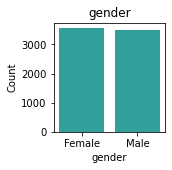

        gender  Count  Percent
Male    Female   3555    50.48
Female    Male   3488    49.52
_________________________________________________________________


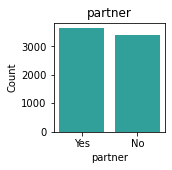

    partner  Count  Percent
No      Yes   3641     51.7
Yes      No   3402     48.3
_________________________________________________________________


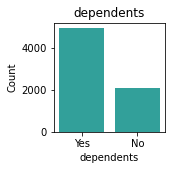

    dependents  Count  Percent
No         Yes   4933    70.04
Yes         No   2110    29.96
_________________________________________________________________


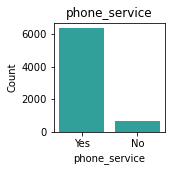

    phone_service  Count  Percent
Yes           Yes   6361    90.32
No             No    682     9.68
_________________________________________________________________


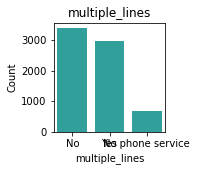

                    multiple_lines  Count  Percent
No                              No   3390    48.13
Yes                            Yes   2971    42.18
No phone service  No phone service    682     9.68
_________________________________________________________________


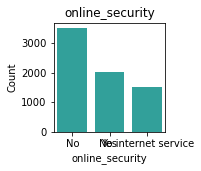

                         online_security  Count  Percent
No                                    No   3498    49.67
Yes                                  Yes   2019    28.67
No internet service  No internet service   1526    21.67
_________________________________________________________________


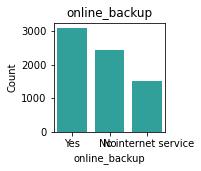

                           online_backup  Count  Percent
No                                   Yes   3088    43.84
Yes                                   No   2429    34.49
No internet service  No internet service   1526    21.67
_________________________________________________________________


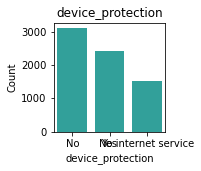

                       device_protection  Count  Percent
No                                    No   3095    43.94
Yes                                  Yes   2422    34.39
No internet service  No internet service   1526    21.67
_________________________________________________________________


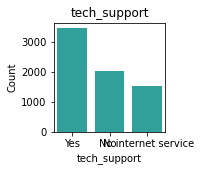

                            tech_support  Count  Percent
No                                   Yes   3473    49.31
Yes                                   No   2044    29.02
No internet service  No internet service   1526    21.67
_________________________________________________________________


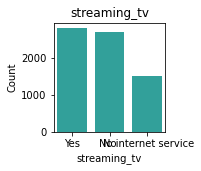

                            streaming_tv  Count  Percent
No                                   Yes   2810    39.90
Yes                                   No   2707    38.44
No internet service  No internet service   1526    21.67
_________________________________________________________________


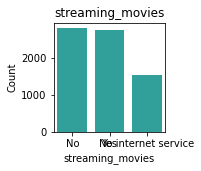

                        streaming_movies  Count  Percent
No                                    No   2785    39.54
Yes                                  Yes   2732    38.79
No internet service  No internet service   1526    21.67
_________________________________________________________________


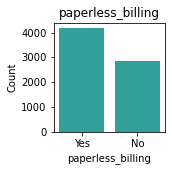

    paperless_billing  Count  Percent
Yes               Yes   4171    59.22
No                 No   2872    40.78
_________________________________________________________________


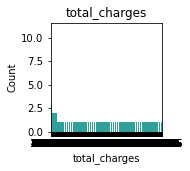

        total_charges  Count  Percent
                593.3     11     0.16
20.2            542.4     11     0.16
19.75          280.85      9     0.13
19.9          1237.85      8     0.11
20.05           267.4      8     0.11
...               ...    ...      ...
2387.75       4018.05      1     0.01
6302.8         633.45      1     0.01
2058.5          742.9      1     0.01
829.55        4627.65      1     0.01
3707.6         3707.6      1     0.01

[6531 rows x 3 columns]
_________________________________________________________________


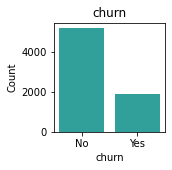

    churn  Count  Percent
No     No   5174    73.46
Yes   Yes   1869    26.54
_________________________________________________________________


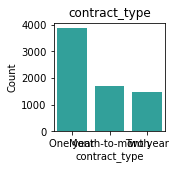

                 contract_type  Count  Percent
Month-to-month        One year   3875    55.02
Two year        Month-to-month   1695    24.07
One year              Two year   1473    20.91
_________________________________________________________________


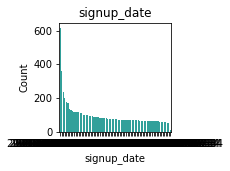

                             signup_date  Count  Percent
2021-12-21 18:07:34  2021-04-21 18:07:34    613     8.70
2016-01-21 18:07:34  2021-09-21 18:07:34    362     5.14
2021-11-21 18:07:34  2020-12-21 18:07:34    238     3.38
2021-10-21 18:07:34  2021-10-21 18:07:34    200     2.84
2021-09-21 18:07:34  2016-02-21 18:07:34    176     2.50
...                                  ...    ...      ...
2019-09-21 18:07:34  2020-07-21 18:07:34     57     0.81
2018-10-21 18:07:34  2017-10-21 18:07:34     56     0.80
2018-05-21 18:07:34  2018-11-21 18:07:34     51     0.72
2019-01-21 18:07:34  2018-07-21 18:07:34     50     0.71
2022-01-21 18:07:34  2022-01-21 18:07:34     11     0.16

[73 rows x 3 columns]
_________________________________________________________________


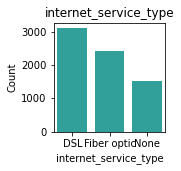

            internet_service_type  Count  Percent
Fiber optic                   DSL   3096    43.96
DSL                   Fiber optic   2421    34.37
None                         None   1526    21.67
_________________________________________________________________


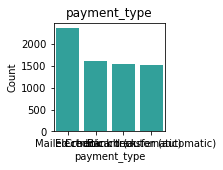

                                        payment_type  Count  Percent
Electronic check                        Mailed check   2365    33.58
Mailed check                        Electronic check   1612    22.89
Bank transfer (automatic)    Credit card (automatic)   1544    21.92
Credit card (automatic)    Bank transfer (automatic)   1522    21.61
_________________________________________________________________


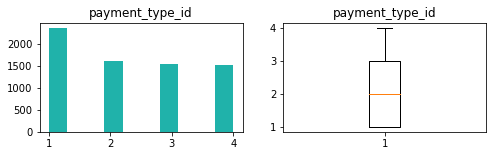

count    7043.000000
mean        2.315633
std         1.148907
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: payment_type_id, dtype: float64


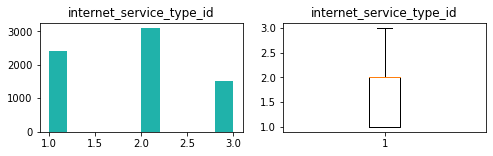

count    7043.000000
mean        1.872923
std         0.737796
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: internet_service_type_id, dtype: float64


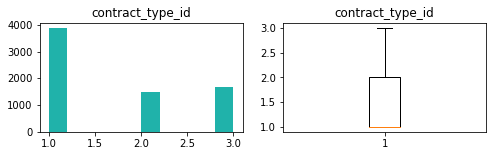

count    7043.000000
mean        1.690473
std         0.833755
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: contract_type_id, dtype: float64


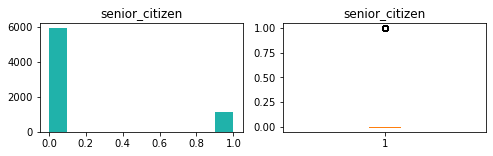

count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: senior_citizen, dtype: float64


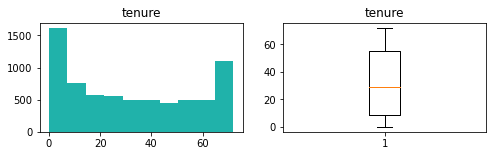

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


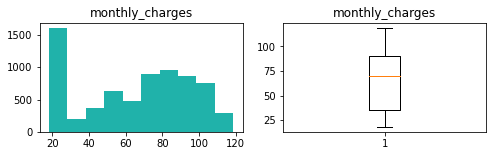

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64


In [7]:
explore_univariate(df_raw,df_raw_cat_vars,df_raw_num_vars)

### Initial Dataset Analysis
- Gender and partner status are about even
- 2:1 Depedents (families) to none
- Vast majority have phone service (9:1)
- For those with phone lines, fairly even split between single and multiple
- Only 30% have online security
- 35% have online backup
- 35% also have device protection (note: explore device vs battery backup)
- Only 30% have tech support (price if signifigant)
- Even split for streaming for those with internet service
- Streaming movies mirrors streaming internet
- 60/40 paperless vs paper billing
- **26.59% overall churn rate**
- 55% month to month, almost evenly split between one year and two year
- 56/44 split between Fiber and DSL
- 1/3 pay by auto check, the rest evenly distributed between mailed, bank transfer and cc
- 16% senior citizens
- Tenure short and long, mean 32 months (mean without top and bottom slightly higher than this mean)
- Monthly charges normal with big low end mode

### Data Prep Plan
- Remove the 11 zero-tenure month records
- Drop customer id
- Drop all id categories (covered by actual categories which are just as wasy to encode)
- Drop signup date (since all churn dates = 1/2022, all tenure captures this information)
- Convert all yes/no to 1/0
- Convert total charges to float

### Questions to Examine
- Is there any difference between genders and partner status with churn (will be impactful since they are so evently represented)
- Any churn difference between families vs individuals?
- What are the impacts of having online security, online backup, device protection, tech support, streaming movies and streaming internet have on churn?  How do these variables relate to one another?
- What are the effects of internet service type, and how does that interplay with the above internet services (security, backup, etc. - multivariate analysis?)
- Does being a senior have an impact?  If not a huge impact shouldn't be a big deal since they are such a small percentage of overall users.
- Does payment method have an impact on churn?

## PREPARE

Prepare from file informed by above analysis.

In [8]:
from prepare import prep_telco
df = prep_telco(df_raw)
df.head(2)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


### Split into train, validate and test datasets according to 56% Train, 24% Validate, 20% Test (random seed = 123)

In [9]:
from splitter import splitter
df_train, df_validate, df_test = splitter(df, target = 'churn')
df_train.sample(2)

Train = 56.0% | Validate = 24.0% | Test = 20.0%


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
141,Female,0,Yes,Yes,48,No,No phone service,Yes,No,Yes,No,No,Yes,No,45.00,2196.3,No,One year,DSL,Credit card (automatic),1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0
3171,Female,0,No,No,16,Yes,Yes,No,No,No,No,No,No,No,72.65,1194.3,Yes,Month-to-month,Fiber optic,Electronic check,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


## Bivariate Analysis

In [ ]:
df_train.info()

### Create categorical and numerical lists.  For numerical remove all encoded variables.

In [10]:
from EDA_functions import explore_bivariate
df_train_cat_vars = [col for col in df_train.columns if df_train[col].dtype == 'object']
df_train_num_vars = [col for col in df_train.columns if df_train[col].dtype != 'object'][1:4]

In [ ]:
df_train_cat_vars, df_train_num_vars

### Most variables are categorical, so using a bivariate exploration function to look at all of them vs churn to see which have an impact on churn.  

In [11]:
from EDA_functions import explore_bivariate

#### Senior citizen was already 'encoded' as an integer and therefore did not appear in the categorical list pulled from the dataframe info, so seperately did this one:

gender 
_____________________

   chi2  p-value  degrees of freedom
0   0.0      1.0                   1

observed:
 churn_encoded     0     1   All
gender                         
Female         1440   521  1961
Male           1451   525  1976
All            2891  1046  3937

expected:
              0           1
0  1439.992634  521.007366
1  1451.007366  524.992634


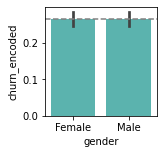


_____________________

partner 
_____________________

        chi2       p-value  degrees of freedom
0  80.089329  3.578599e-19                   1

observed:
 churn_encoded     0     1   All
partner                        
No             1364   663  2027
Yes            1527   383  1910
All            2891  1046  3937

expected:
              0           1
0  1488.457455  538.542545
1  1402.542545  507.457455


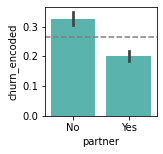


_____________________

dependents 
_____________________

         chi2       p-value  degrees of freedom
0  104.542502  1.538574e-24                   1

observed:
 churn_encoded     0     1   All
dependents                     
No             1885   860  2745
Yes            1006   186  1192
All            2891  1046  3937

expected:
              0           1
0  2015.695961  729.304039
1   875.304039  316.695961


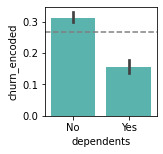


_____________________

phone_service 
_____________________

       chi2   p-value  degrees of freedom
0  0.876869  0.349061                   1

observed:
 churn_encoded     0     1   All
phone_service                  
No              282    91   373
Yes            2609   955  3564
All            2891  1046  3937

expected:
             0          1
0   273.89967   99.10033
1  2617.10033  946.89967


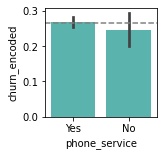


_____________________

multiple_lines 
_____________________

        chi2   p-value  degrees of freedom
0  11.077952  0.003931                   2

observed:
 churn_encoded        0     1   All
multiple_lines                    
No                1429   466  1895
No phone service   282    91   373
Yes               1180   489  1669
All               2891  1046  3937

expected:
              0           1
0  1391.527813  503.472187
1   273.899670   99.100330
2  1225.572517  443.427483


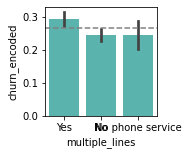


_____________________

online_security 
_____________________

         chi2        p-value  degrees of freedom
0  510.520615  1.386300e-111                   2

observed:
 churn_encoded           0     1   All
online_security                      
No                   1099   819  1918
No internet service   803    64   867
Yes                   989   163  1152
All                  2891  1046  3937

expected:
              0           1
0  1408.417069  509.582931
1   636.651511  230.348489
2   845.931420  306.068580


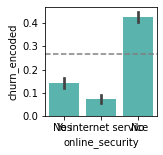


_____________________

online_backup 
_____________________

         chi2       p-value  degrees of freedom
0  326.015433  1.609342e-71                   2

observed:
 churn_encoded           0     1   All
online_backup                        
No                   1023   674  1697
No internet service   803    64   867
Yes                  1065   308  1373
All                  2891  1046  3937

expected:
              0           1
0  1246.133350  450.866650
1   636.651511  230.348489
2  1008.215138  364.784862


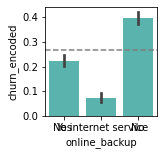


_____________________

device_protection 
_____________________

         chi2       p-value  degrees of freedom
0  314.354955  5.478843e-69                   2

observed:
 churn_encoded           0     1   All
device_protection                    
No                   1027   666  1693
No internet service   803    64   867
Yes                  1061   316  1377
All                  2891  1046  3937

expected:
              0           1
0  1243.196088  449.803912
1   636.651511  230.348489
2  1011.152400  365.847600


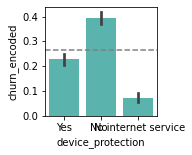


_____________________

tech_support 
_____________________

         chi2        p-value  degrees of freedom
0  460.871935  8.373959e-101                   2

observed:
 churn_encoded           0     1   All
tech_support                         
No                   1126   805  1931
No internet service   803    64   867
Yes                   962   177  1139
All                  2891  1046  3937

expected:
              0           1
0  1417.963170  513.036830
1   636.651511  230.348489
2   836.385319  302.614681


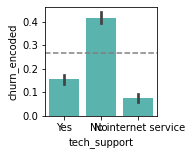


_____________________

streaming_tv 
_____________________

         chi2       p-value  degrees of freedom
0  226.175317  7.702893e-50                   2

observed:
 churn_encoded           0     1   All
streaming_tv                         
No                   1004   545  1549
No internet service   803    64   867
Yes                  1084   437  1521
All                  2891  1046  3937

expected:
              0           1
0  1137.454661  411.545339
1   636.651511  230.348489
2  1116.893828  404.106172


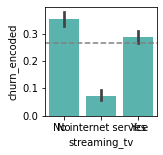


_____________________

streaming_movies 
_____________________

         chi2       p-value  degrees of freedom
0  220.438256  1.356566e-48                   2

observed:
 churn_encoded           0     1   All
streaming_movies                     
No                   1000   529  1529
No internet service   803    64   867
Yes                  1088   453  1541
All                  2891  1046  3937

expected:
              0           1
0  1122.768352  406.231648
1   636.651511  230.348489
2  1131.580137  409.419863


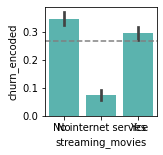


_____________________

paperless_billing 
_____________________

         chi2       p-value  degrees of freedom
0  141.364215  1.339372e-32                   1

observed:
 churn_encoded         0     1   All
paperless_billing                  
No                 1347   266  1613
Yes                1544   780  2324
All                2891  1046  3937

expected:
              0           1
0  1184.450851  428.549149
1  1706.549149  617.450851


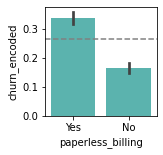


_____________________

churn 
_____________________

          chi2  p-value  degrees of freedom
0  3931.875993      0.0                   1

observed:
 churn_encoded     0     1   All
churn                          
No             2891     0  2891
Yes               0  1046  1046
All            2891  1046  3937

expected:
             0          1
0  2122.90602  768.09398
1   768.09398  277.90602


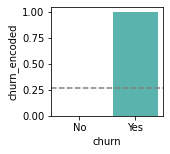


_____________________

contract_type 
_____________________

         chi2        p-value  degrees of freedom
0  664.657249  4.693667e-145                   2

observed:
 churn_encoded      0     1   All
contract_type                   
Month-to-month  1238   927  2165
One year         726    89   815
Two year         927    30   957
All             2891  1046  3937

expected:
              0           1
0  1589.792990  575.207010
1   598.467107  216.532893
2   702.739903  254.260097


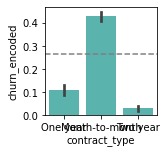


_____________________

internet_service_type 
_____________________

         chi2       p-value  degrees of freedom
0  439.766148  3.206227e-96                   2

observed:
 churn_encoded             0     1   All
internet_service_type                  
DSL                    1101   247  1348
Fiber optic             987   735  1722
None                    803    64   867
All                    2891  1046  3937

expected:
              0           1
0   989.857252  358.142748
1  1264.491237  457.508763
2   636.651511  230.348489


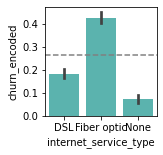


_____________________

payment_type 
_____________________

         chi2       p-value  degrees of freedom
0  338.485229  4.643588e-73                   3

observed:
 churn_encoded                 0     1   All
payment_type                               
Bank transfer (automatic)   713   149   862
Credit card (automatic)     750   145   895
Electronic check            708   581  1289
Mailed check                720   171   891
All                        2891  1046  3937

expected:
             0           1
0  632.979934  229.020066
1  657.212344  237.787656
2  946.532639  342.467361
3  654.275083  236.724917


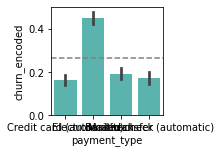


_____________________

tenure 
____________________



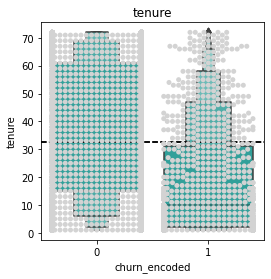

                count       mean        std  min   25%   50%   75%   max
churn_encoded                                                           
0              2891.0  38.003459  24.177715  1.0  15.0  39.0  61.0  72.0
1              1046.0  18.325048  19.960763  1.0   2.0  10.0  31.0  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2237485.5, pvalue=1.7462087268198276e-117)

____________________

monthly_charges 
____________________



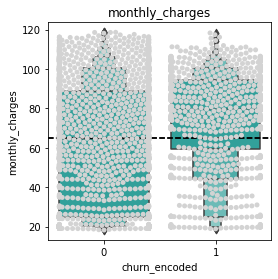

                count       mean        std    min     25%    50%      75%  \
churn_encoded                                                                
0              2891.0  61.218091  31.349533  18.25  25.000  64.50  89.0250   
1              1046.0  74.719216  24.593969  18.85  59.525  79.85  94.2375   

                  max  
churn_encoded          
0              118.65  
1              118.35   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1140707.5, pvalue=4.601429737222539e-32)

____________________

total_charges 
____________________



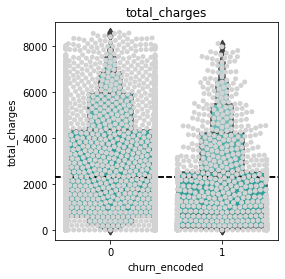

                count         mean          std    min       25%       50%  \
churn_encoded                                                                
0              2891.0  2583.071792  2343.182641  18.85  574.4250  1718.200   
1              1046.0  1580.769742  1934.641968  18.85  116.5875   699.475   

                    75%     max  
churn_encoded                    
0              4369.550  8594.4  
1              2514.025  8109.8   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1962317.5, pvalue=2.3468103663029577e-46)

____________________



In [12]:
explore_bivariate(df_train,'churn_encoded',df_train_cat_vars,df_train_num_vars)

Followed up using this technique to determine impact of cat variables, as well as determine their independence (or lack thereof) from each other:

In [ ]:
import itertools
from scipy import stats

In [ ]:
explore_bivariate(df_train,'churn_encoded',['senior_citizen'])#,df_train_num_vars)

In [ ]:
combinations = list(itertools.combinations(df_train_cat_vars, 2))
combinations

In [ ]:
alpha = 0.05
outcomes = []
for combination in combinations:
    outcome = {}
    outcome["column1"] = combination[0]
    outcome["column2"] = combination[1]

    observed = pd.crosstab(df[combination[0]], df[combination[1]])
    
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    
    outcome["p"] = p
    
    if p < alpha:
        outcome["reject_null"] = True
    else:
        outcome["reject_null"] = False
    
    outcomes.append(outcome)

pd.set_option('display.max_rows', None)    
pd.DataFrame(outcomes)


In [ ]:
from EDA_functions import explore_bivariate_quant

In [ ]:
explore_bivariate_quant(df_train,'churn_encoded','monthly_charges')

#### Plot to examine the relationship between tenure, monthly charges and churn.

### Comparing monthly charges to churn using t-tests:

Seperate train set data into churned and not churned dfs

In [ ]:
train_churn_sample = df_train[df_train.churn == 'Yes']
train_nochurn_sample = df_train[df_train.churn == 'No']

One sided t-test against population mean:

In [ ]:
overall_mean = df_train.monthly_charges.mean()

t, p = stats.ttest_1samp(train_churn_sample.monthly_charges, overall_mean)
t, p/2

One sided t-test comparing churn vs non-churned means:

In [ ]:
t, p = stats.ttest_ind(train_churn_sample.monthly_charges, train_nochurn_sample.monthly_charges, equal_var=False)
t, p / 2

NOTE: Total charges not particularly useful because those who churn quickly have low total charges, but so do those who have long tenure of just phone services.

### Both t-test support the alternative hypothesis, that monthly charges do effect churn negatively.

##### As such, let's do some dataframe grouping of different variables to see how they effect cost.

## Multivariate Analysis

In [ ]:
sns.relplot(data=df_train, x='tenure', y='monthly_charges', hue='churn')

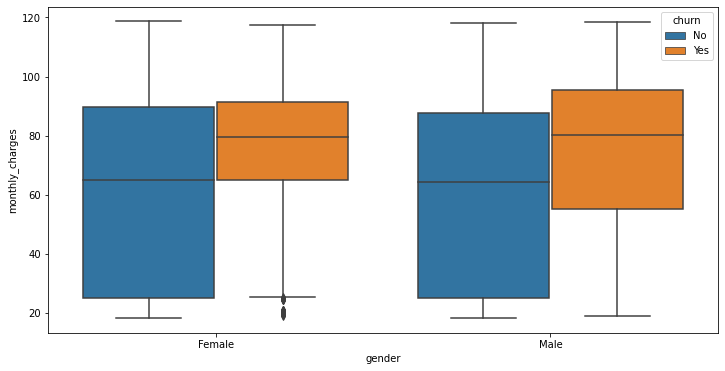

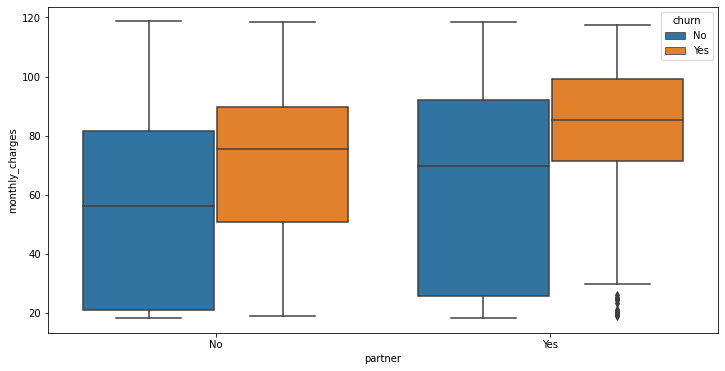

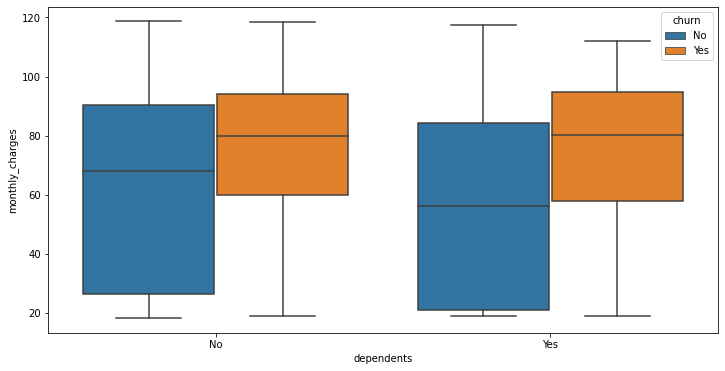

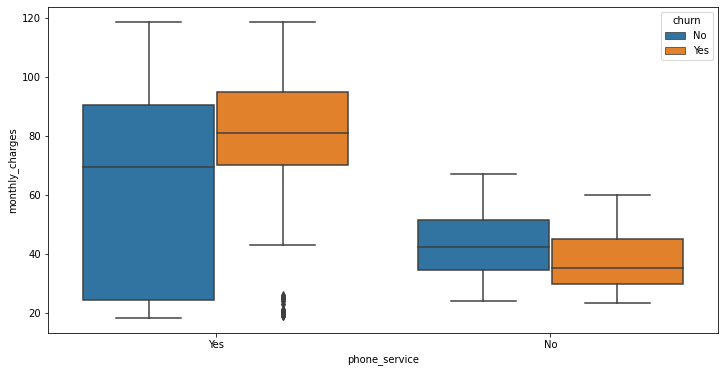

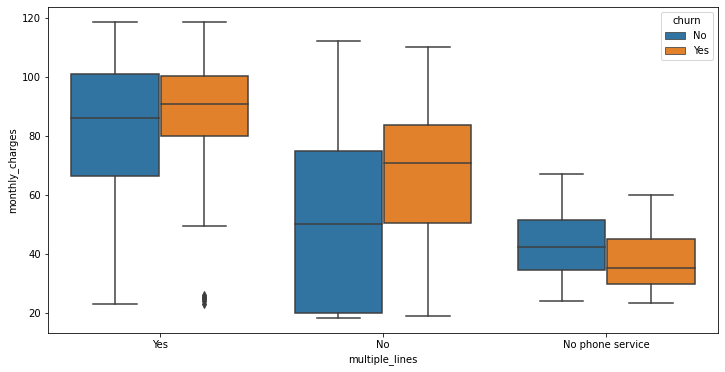

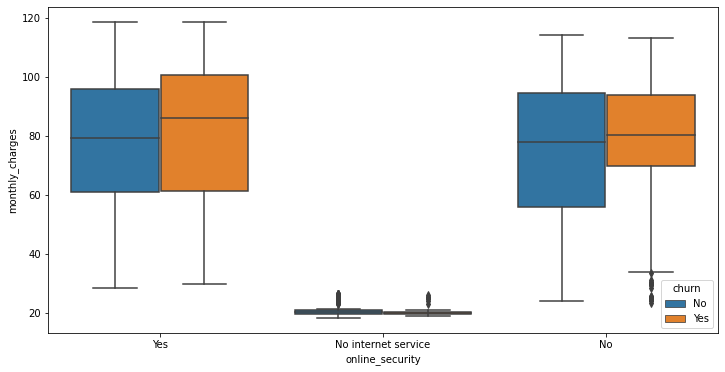

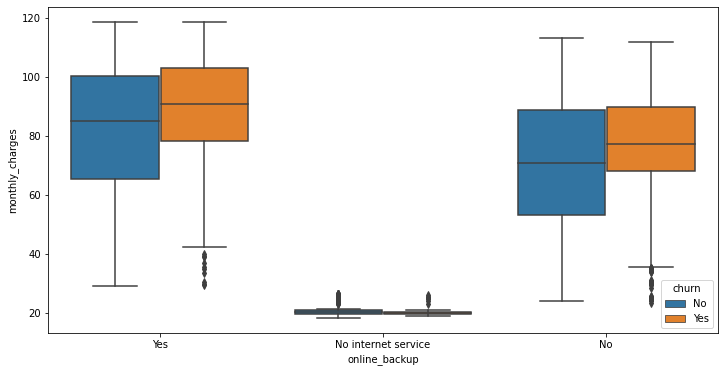

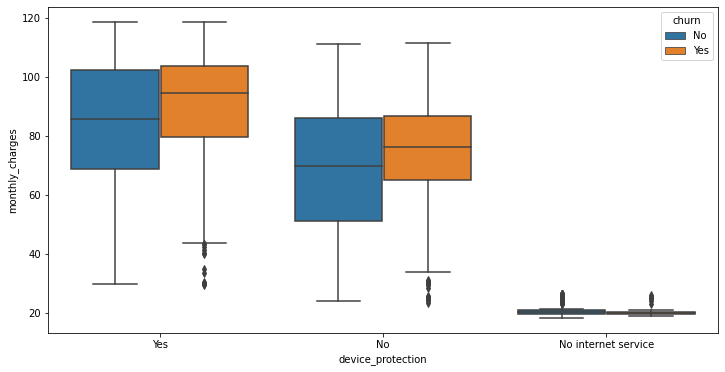

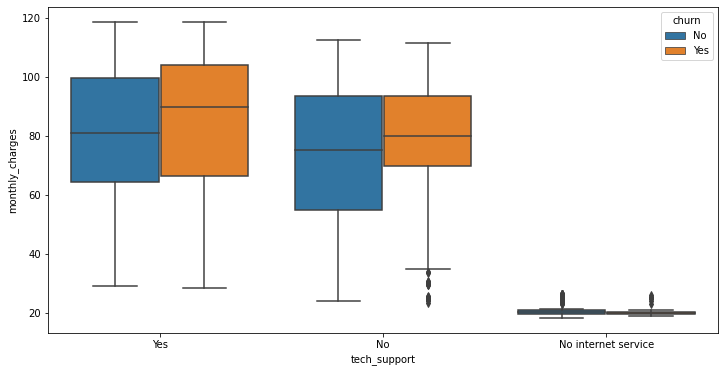

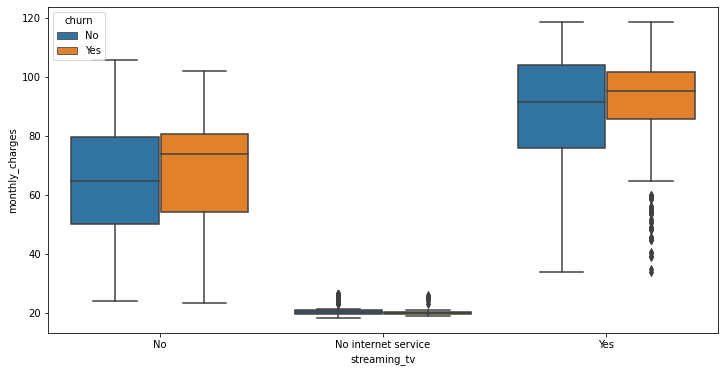

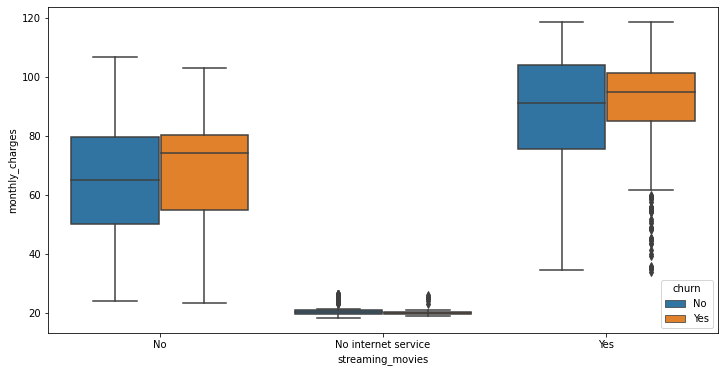

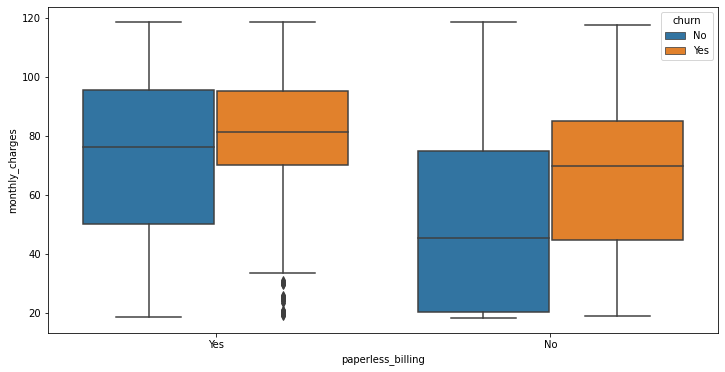

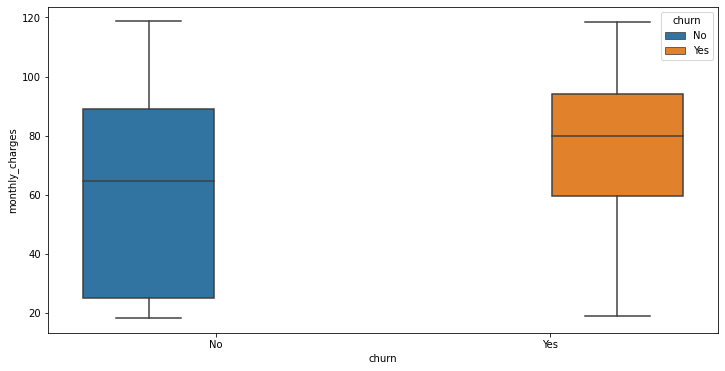

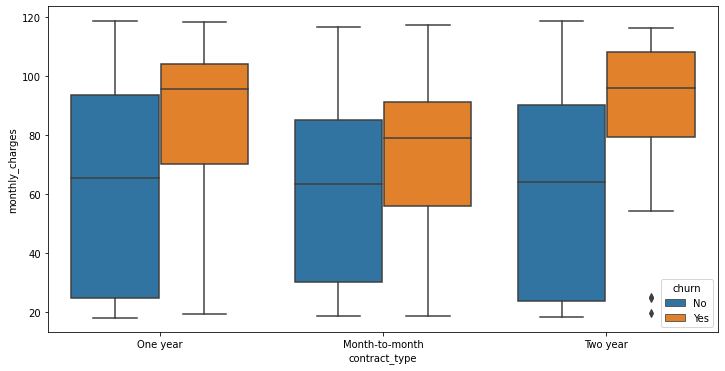

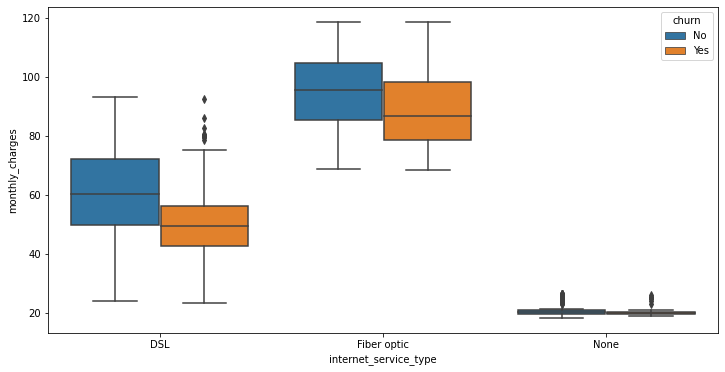

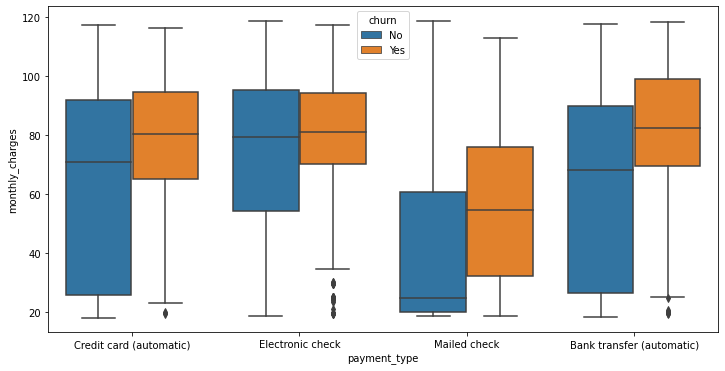

In [13]:
for col in df_train_cat_vars:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_train, x=col,y='monthly_charges',hue='churn')
    plt.show()

# Classification Analysis

In [ ]:
# drop all non-encoded columns except churn, but drop churn_encoded as well
